In [15]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import seaborn as sns
from datetime import datetime
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
pylab.rcParams['figure.figsize'] = (24, 18)

In [16]:
def clean_up_columns(data):
    df=pd.DataFrame()
    for old_name in data.columns:
        new_name = old_name.split('TRc1')[0][:-1]
        df[new_name]=data[old_name]
    return df

In [17]:
data=pd.read_csv('Price.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='last')
price = clean_up_columns(data)
data=pd.read_csv('Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='mean')
vol = clean_up_columns(data)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  app.launch_new_instance()


In [18]:
data=pd.read_csv('CurrencyMap.csv',index_col=0).T
fxmap = clean_up_columns(data).T
currency_map={'£':'GBP',
                'A$':'AUD',
                'C':'BRL',
                'C$':'CAD',
                'CH':'CNY',
                'E':'EUR',
                'K$':'HKD',
                'KW':'KRW',
                'MP':'MXN',
                'NK':'NOK',
                'PZ':'PLN',
                'R':'ZAR',
                'S$':'SGD',
                'SF':'CHF',
                'SK':'SEK',
                'SP':'USD',
                'U$':'USD',
                'UC':'Cent',
                'Y':'JPY',
                'Z$':'NZD'}
fx=pd.read_csv('currency.csv',index_col=0,parse_dates=['DATE']).resample(rule='m',how='last')
fx['USD']=1

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:23: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()


In [19]:
for p in price.columns:
     if p not in vol.columns:
            print p

AEX-AEX INDEX
MEXDER-10YR BOND
ME-BANK ACCEPT. 90 DAY
CBT-SOYABEAN OIL COMP.
ME-10Y CANADIAN GOVT BOND
NYM-LIGHT CRUDE OIL
ZCE-RAPESEED MEAL
DCE-PLYWOOD
DCE-EGG
BMF-US DOLLAR
CME-3 MTH EURODOLLAR COMP.
NORDPOOL-ENO QTR
EEX-MONTHLY PEAKLOAD
LIFFE-10Y E SWAPNOTE
LIFFE-2YR E SWAPNOTE
EUREX-EURO BTP
ENDEX-TTF GAS BASE LOAD
ENDEX-TTF GAS BASE LOAD QTR
ENDEX-TTF GAS BASE LOAD SEASON
CBT-WHEAT C.01 DEA


In [20]:
df=pd.DataFrame()
for v in vol.columns:
    try:
        curr= currency_map[fxmap['FX'].T[v]]
        if curr == 'cent':
            df[v]=(vol[v]/100.*price[v])
        else:
            df[v]=(vol[v]/fx[curr]*price[v])
    except:
        print 'Issues: ' + v + ' and ' + curr

Issues: CME-AUSTRALIAN DOLLR COMP. and USD
Issues: CME-BRAZILIAN REAL COMP. and USD
Issues: BMF-CORN CASH and USD
Issues: CME-CANADIAN DOLLAR COMP. and USD
Issues: CFFEX-CSI 300 INDEX and CNY
Issues: ZCE-RAPESEED OIL and CNY
Issues: CSCE-COTTON #2 and CHF
Issues: ZCE-THERMAL COAL and CNY
Issues: DCE-POLYPROPYLENE and CNY
Issues: DCE-COKING COAL and CNY
Issues: DCE-PVC and CNY
Issues: CME-1MTH EURODOLLAR COMP and USD
Issues: NORDPOOL-ENO YEAR and EUR
Issues: EEX-MONTHLY BASELOAD and USD
Issues: EEX-QUARTERLY PEAK LOAD and EUR
Issues: MONEP-CAC 40 INDEX and EUR
Issues: EUREX-DAX INDEX and EUR
Issues: LIFFE-3MTH EUROSWISS and EUR
Issues: LIFFE-FTSE EUROTOP 100 and EUR
Issues: EUREX-EURO STOXX 50 IND DIV and EUR
Issues: LIFFE-SHORT EUROYEN TIBOR and EUR
Issues: CBT-30 DAY FED FUNDS COMP and EUR
Issues: LIFFE-FTSE 100 INDEX and EUR
Issues: EUREX-EURO BUND and EUR
Issues: LIFFE-LONG GILT and EUR
Issues: LIFFE-FTSE 250 INDEX and EUR
Issues: LIFFE-3MTH STERLING and CHF
Issues: WSE-WIG 20 and U

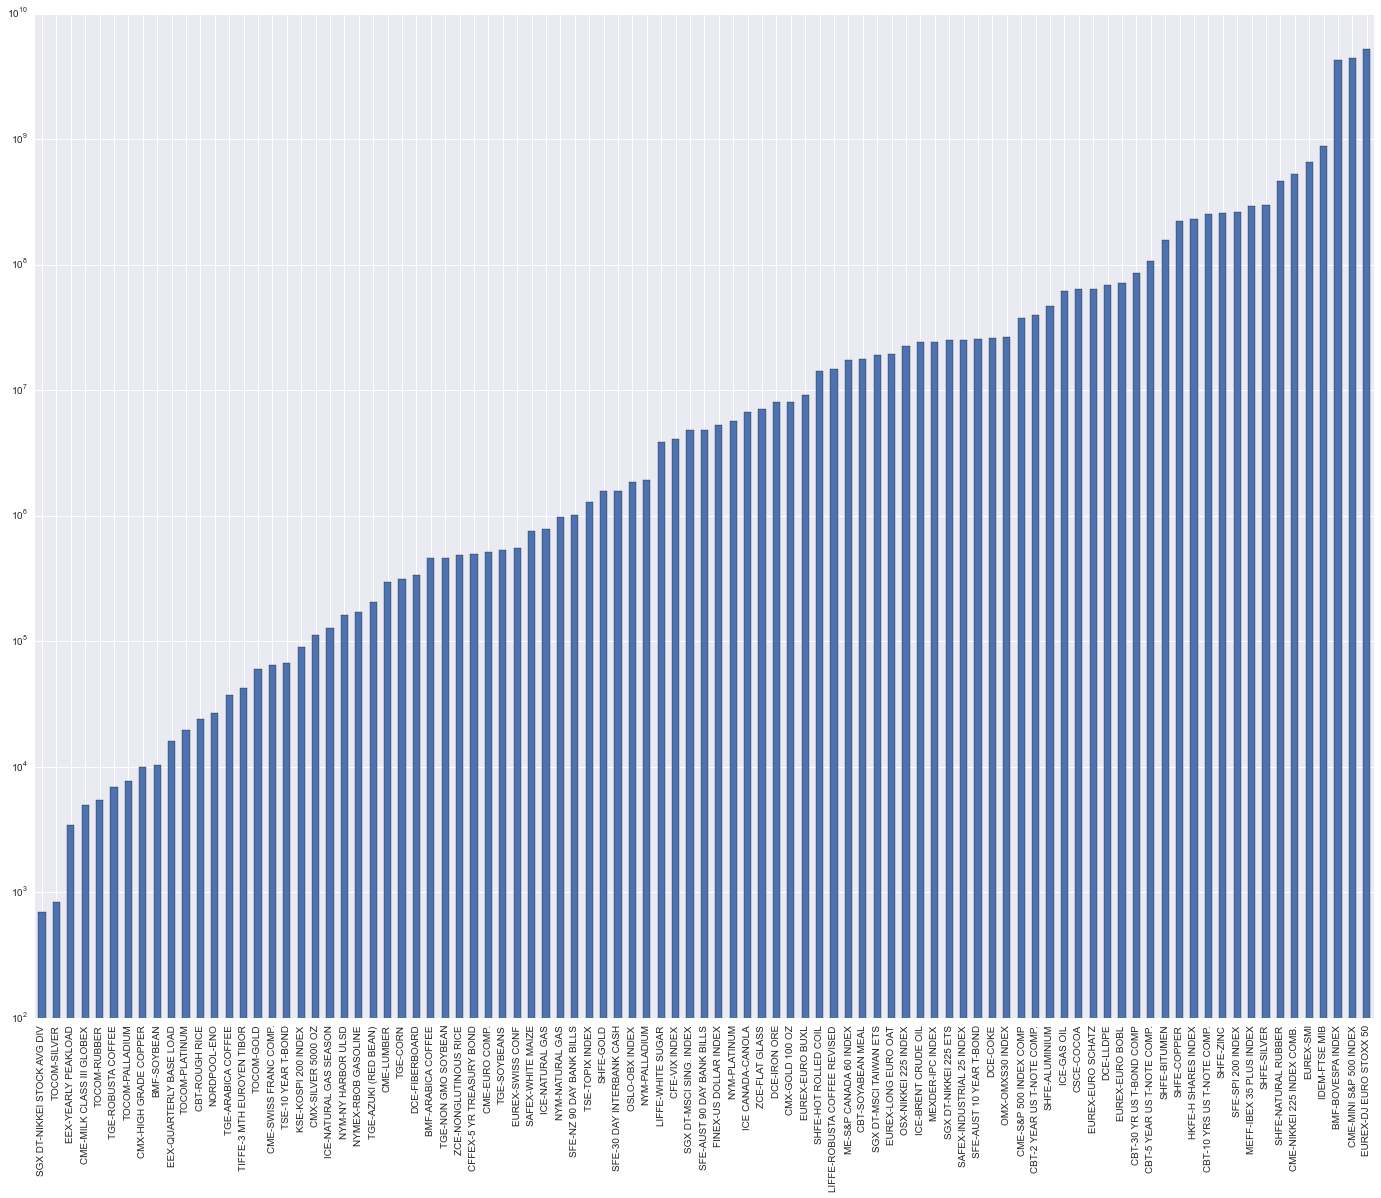

In [21]:
df.max().sort_values().plot(kind='bar',logy=True)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,adjust=True,com=12).mean()
  if __name__ == '__main__':


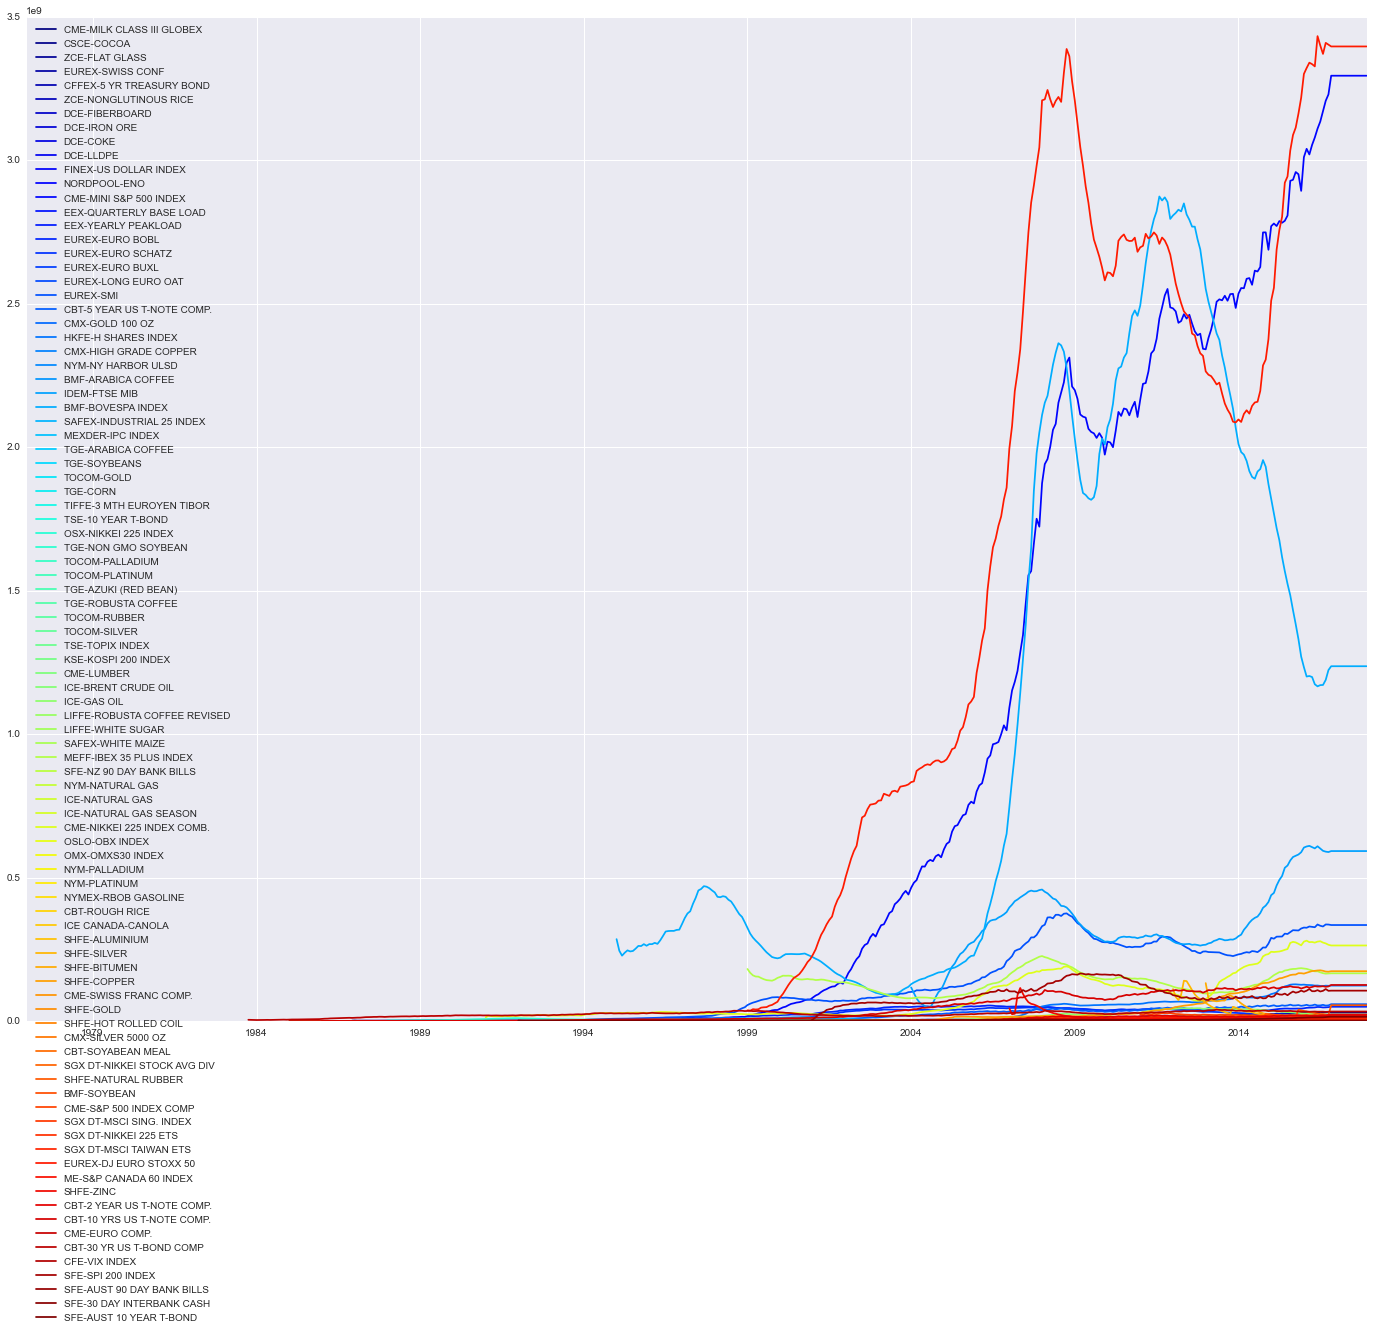

In [22]:
pd.ewma(df,12).plot(colormap='jet')

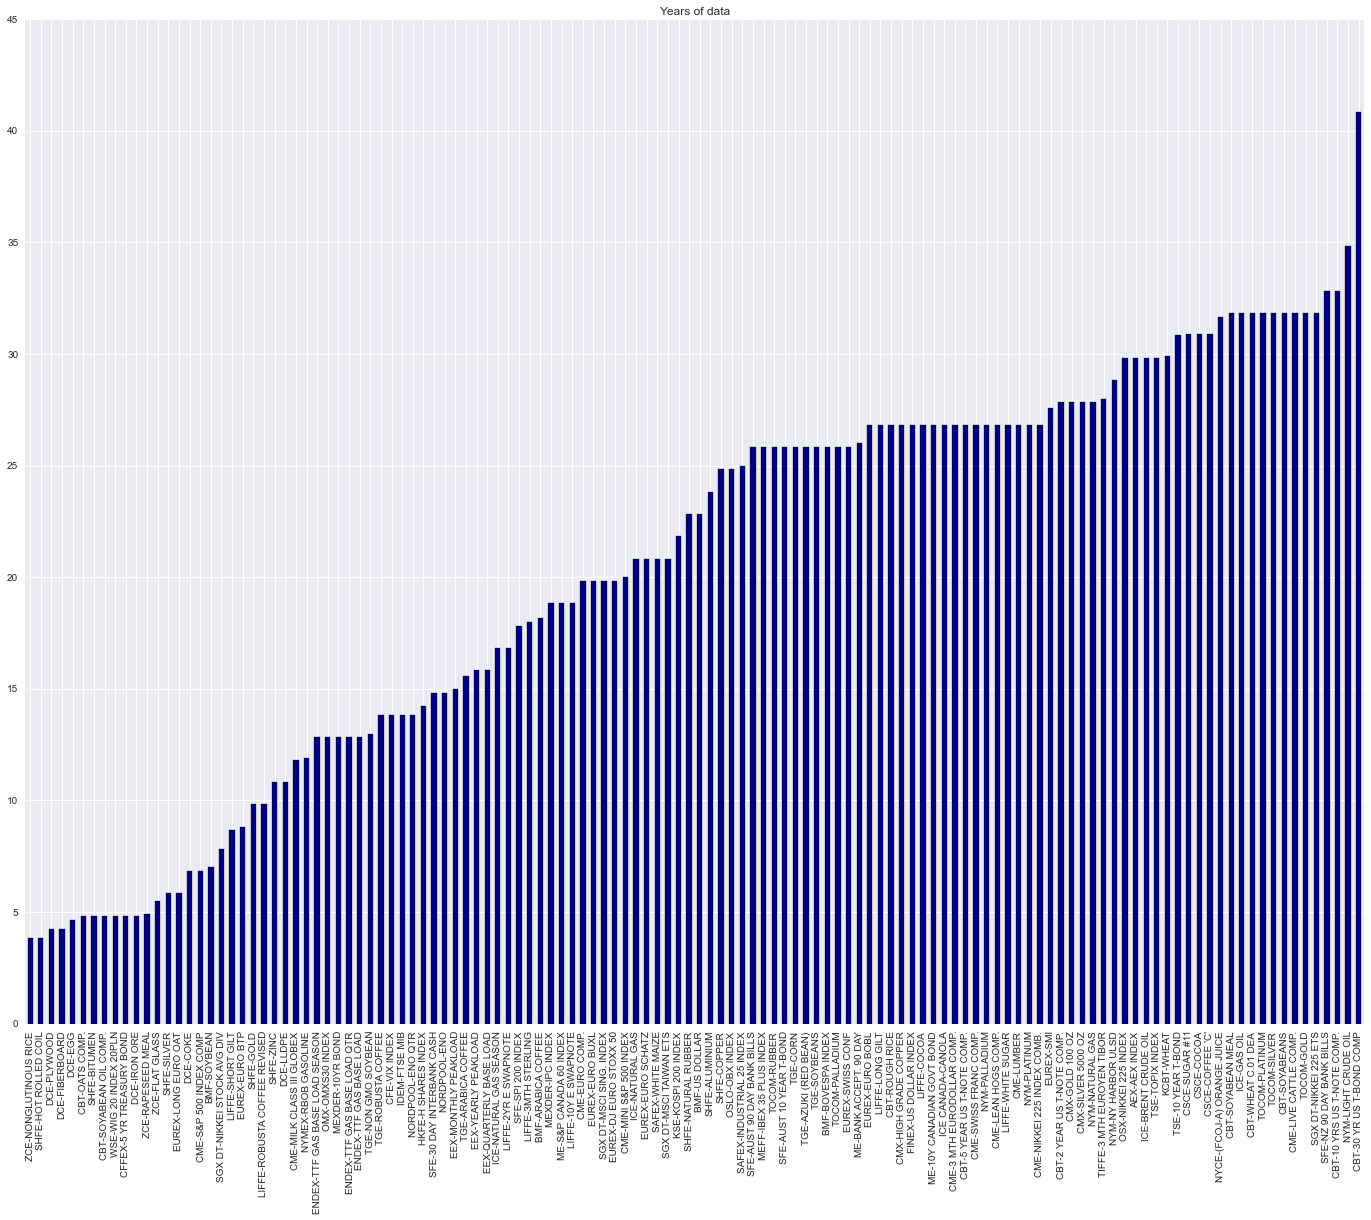

In [23]:
(price.count()/12.).sort_values().plot(colormap='jet',kind='bar',title='Years of data')

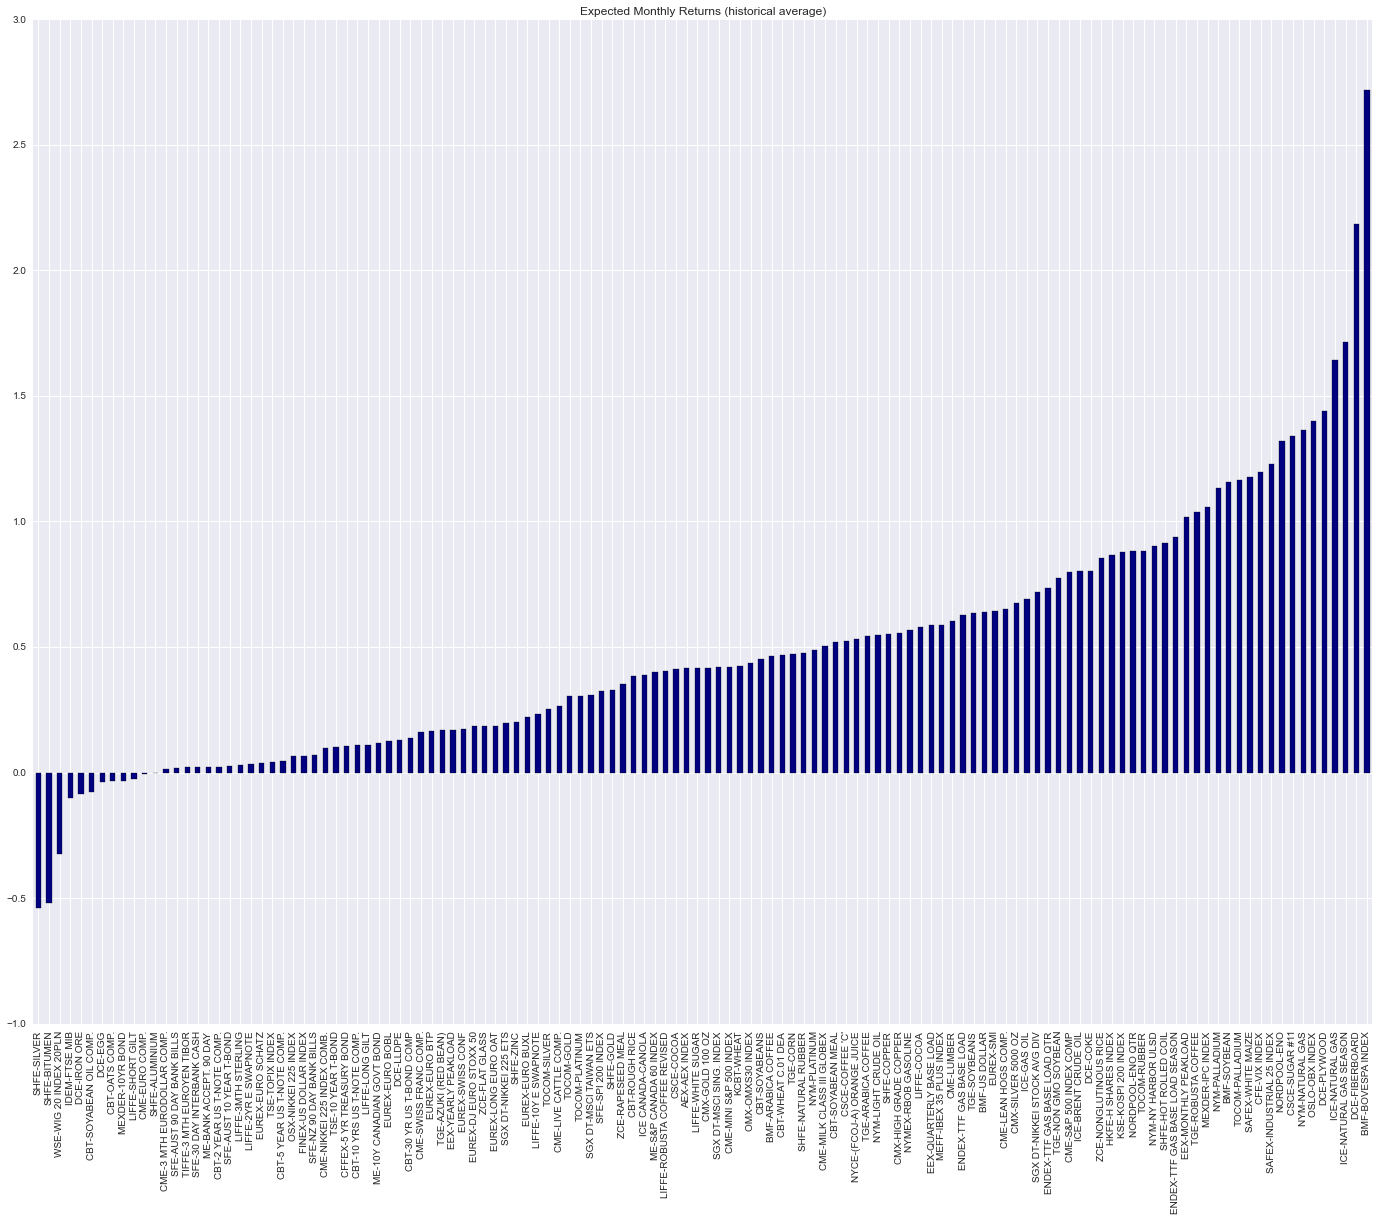

In [34]:
(price.pct_change().mean()*100).sort_values().plot(colormap='jet',title='Expected Monthly Returns (historical average)',kind='bar')

In [35]:
(price.pct_change().mean()*100).sort_values().tail()

DCE-PLYWOOD               1.438591
ICE-NATURAL GAS           1.641875
ICE-NATURAL GAS SEASON    1.713249
DCE-FIBERBOARD            2.185902
BMF-BOVESPA INDEX         2.719169
dtype: float64

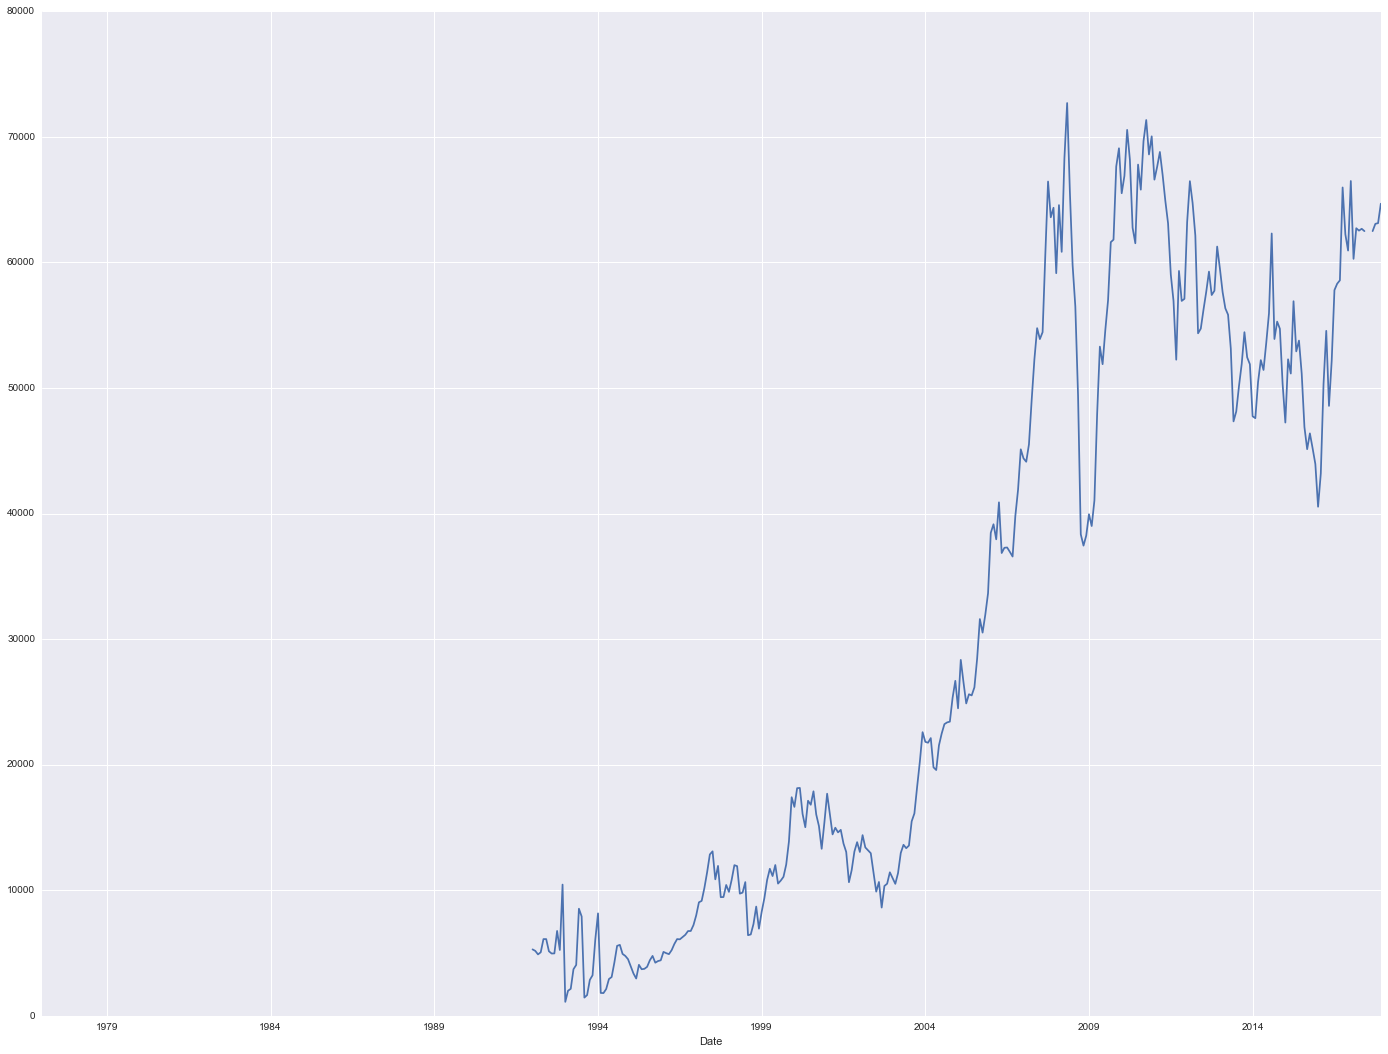

In [36]:
price['BMF-BOVESPA INDEX'].plot()